# Extreme events in Turbulence







In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

filename = "/Users/enricofonda/Data_science/Turbulence/ENST"
enstrophy_linear = np.fromfile(filename, dtype = np.dtype('>f4'))

print(enstrophy_linear)
print(np.mean(enstrophy_linear[:16777216]))
print(np.mean(enstrophy_linear[16777216:]))

enstrophy_linear = enstrophy_linear[:16777216]



[ 1061.34179688  1557.61608887  2319.22265625 ...,     0.             0.
     0.        ]
117.949
471.795
0.0


Calculate the first six moments

In [2]:
print(np.sum(np.square(enstrophy_linear))/16777216)
print(np.sum(np.power(enstrophy_linear,2))/16777216)
print(np.sum(np.power(enstrophy_linear,3))/16777216)
print(np.sum(np.power(enstrophy_linear,4))/16777216)
print(np.sum(np.power(enstrophy_linear,5))/16777216)
print(np.sum(np.power(enstrophy_linear,6))/16777216)


1047662.9375
1047662.9375
7047169536.0
1.00741662376e+14
2.29039761962e+18
6.82271024109e+22


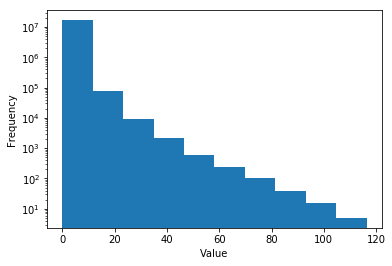

In [3]:
im = plt.hist(enstrophy_linear/np.mean(enstrophy_linear))
plt.yscale('log', nonposy='clip')
plt.xlabel("Value")
plt.ylabel("Frequency")
#fig = plt.gcf()

In [5]:
enstrophy = np.reshape(enstrophy_linear[:16777216],(256,256,256)) 
enstrophy = enstrophy/np.mean(enstrophy)

In [6]:
print(enstrophy.max())
print(enstrophy.mean())

116.365
0.999999


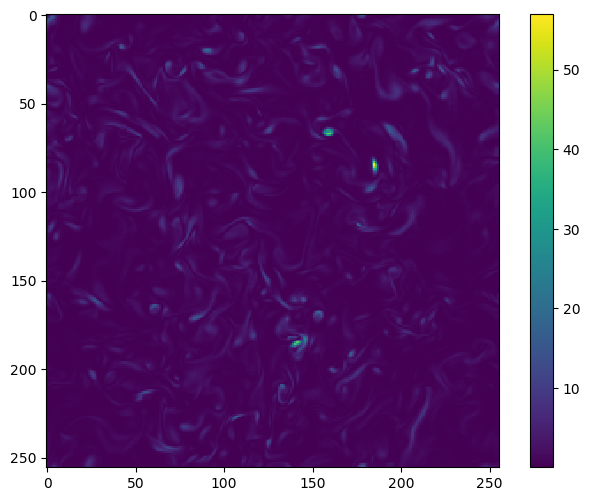

In [7]:
im = plt.figure(figsize=(8, 6), dpi=100)
im = plt.imshow(enstrophy[1,:,:])
plt.colorbar(im)
plt.show()

In [21]:
import copy
enstrophy_x = copy.copy(enstrophy)# 
low_values_indices = enstrophy_x < (40)  # Where values are low
print(100*(16777216 - np.sum(low_values_indices))/16777216, "%")
enstrophy_x[low_values_indices] = 0 

0.0109195709229 %


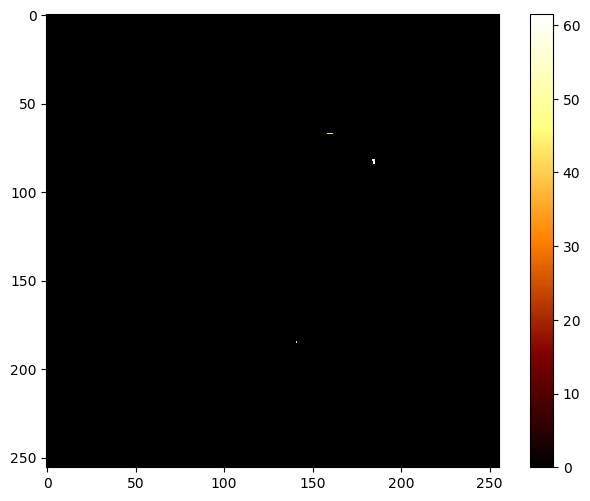

In [22]:
im = plt.figure(figsize=(8, 6), dpi=100)
im = plt.imshow(enstrophy_x[0,:,:], cmap=cm.afmhot)
plt.colorbar(im)
plt.show()

To see animation run animation.py.

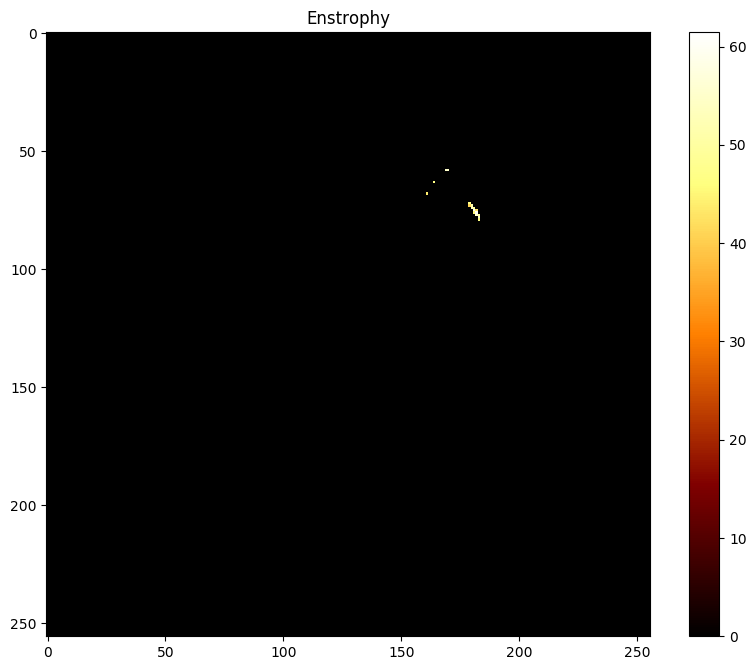

In [36]:
# Animation.py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

filename = "/Users/enricofonda/Data_science/Turbulence/ENST"
enstrophy_linear = np.fromfile(filename, dtype = np.dtype('>f4'))

enstrophy = np.reshape(enstrophy_linear[:16777216],(256,256,256)) 
enstrophy = enstrophy / np.mean(enstrophy)

enstrophy_x = enstrophy
low_values_indices = enstrophy_x < 40
enstrophy_x[low_values_indices] = 0 

for i in range(255):
    im=enstrophy_x[i,:,:]
    if i == 0:
        img = plt.figure(figsize=(10, 8), dpi=100)
        img = plt.imshow(im, cmap=cm.afmhot)
        fig = plt.gcf()
        plt.clim()  
        plt.colorbar(img)
        plt.title("Enstrophy")
    else:
        img.set_data(im)
        
    #print("step", i)
    plt.pause(0.03)    

In [23]:
z = 255
x = []
y = []
for i in range(255):
    for j in range(255):
        if enstrophy_x[z,i,j]>0:
            x.append(i)
            y.append(j)
                   
x_a = np.array(x)
y_a = np.array(y)
print(x_a)
print(y_a)                
                

[ 59  60  67  67  68  78  79  79  80  81  81  82 184]
[169 168 160 161 160 183 183 184 184 184 185 184 141]


In [26]:
y_event = []
x_event = []
y_event2 = []
x_event2 = []
for i in x_a:
   for j in np.where(x_a == i):
       q=0
       for k in y_a[j]:
           if y_a[q] == y_a[q-1]+1 or y_a[q-1]-1 and q!=0:
               pass
           else:
               if k not in y_event:
                 x_event.append(i)
                 y_event.append(k)   
           q = q + 1   
print(x_event)
print(y_event)       

[59, 60, 67, 78, 80, 184]
[169, 168, 160, 183, 184, 141]


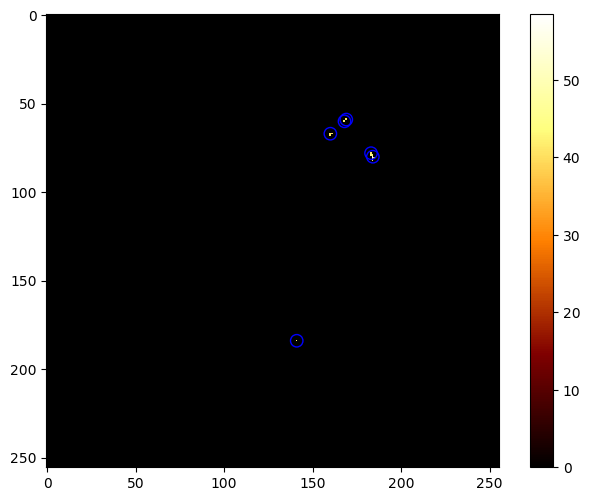

In [27]:
im = plt.figure(figsize=(8, 6), dpi=100)
im = plt.imshow(enstrophy_x[z,:,:], cmap=cm.afmhot)
plt.colorbar(im) 
plt.scatter(y_event, x_event, s=80, facecolors='none', edgecolors='b')  
plt.show()   

[59, 60, 67, 78, 184]
[169, 168, 160, 183, 141]


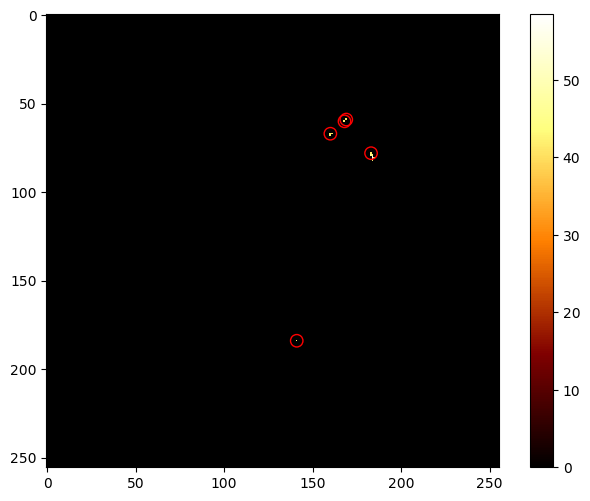

In [29]:
y_event2 = []
x_event2 = []
p = 0     
for m in y_event:
   if y_event[p] == y_event[p-1]+1:
       pass 
   else:
       x_event2.append(x_event[p])
       y_event2.append(m)
   p = p + 1           
               
print(x_event2)
print(y_event2)
  
im = plt.figure(figsize=(8, 6), dpi=100)
im = plt.imshow(enstrophy_x[z,:,:], cmap=cm.afmhot)
plt.colorbar(im)
plt.scatter(y_event2, x_event2, s=80, facecolors='none', edgecolors='r')   
plt.show()          


In [17]:
array = np.array([[0,0,0,0]])
for z in range(255):
    x = []
    y = []
    for i in range(255):
        for j in range(255):
            if enstrophy_x[z,i,j]>0:
                x.append(i)
                y.append(j)
                array = np.append(array,[[i,j,z,0]],0)

In [18]:
print(enstrophy_x.shape)
print(array.shape)
#print(array)

(256, 256, 256)
(344, 4)


In [19]:
rng = len(array)
for i in range(rng):
    #print(array[i,:])
    for j in range(rng):
        if array[j,0] == array[i,0] and array[j,1] == array[i,1] and array[j,2] == array[i,2] and array[j,3] ==0:
            array[j,3] = 2

        elif array[j,3] == 0 and array[j,0]<array[i,0]+5 and array[j,1]<array[i,1]+5 and array[j,2]<array[i,2]+5:
                #print('duplicate', array[j,:])
                array[j,3] = 1

import pandas as pd

df = pd.DataFrame(array,columns = ['x','y','z','duplicate'])

pd.DataFrame(array)

df[df['duplicate'] == 2]

,x,y,z,duplicate
0,0,0,0,2
1,83,185,0,2
2,76,146,26,2
5,93,171,33,2
9,210,131,34,2
13,219,132,34,2
29,104,217,38,2
61,251,125,44,2
89,61,35,63,2
93,182,66,66,2


In [20]:
df[df['duplicate'] == 2].shape

(32, 4)